<a href="https://colab.research.google.com/github/cukri/RNN_Pekin/blob/main/RNN_Pekin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization

In [ ]:
df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv", usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,16])

In [ ]:
df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   PM2.5   34368 non-null  float64
 5   PM10    34580 non-null  float64
 6   SO2     34395 non-null  float64
 7   NO2     34310 non-null  float64
 8   CO      33767 non-null  float64
 9   O3      33986 non-null  float64
 10  TEMP    35045 non-null  float64
 11  PRES    35045 non-null  float64
 12  DEWP    35045 non-null  float64
 13  RAIN    35045 non-null  float64
 14  WSPM    35051 non-null  float64
 15  date    35064 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 4.3 MB


In [ ]:
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)
df['day'] = df['day'].astype(str)

In [ ]:
df['date'] = df['year'] + "-" + df["month"] + "-" + df['day']

In [ ]:
print(df)

       year month day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0      2013     3   1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1      2013     3   1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2      2013     3   1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3      2013     3   1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4      2013     3   1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   
...     ...   ...  ..   ...    ...   ...  ...   ...    ...   ...   ...   
35059  2017     2  28    19   11.0  32.0  3.0  24.0  400.0  72.0  12.5   
35060  2017     2  28    20   13.0  32.0  3.0  41.0  500.0  50.0  11.6   
35061  2017     2  28    21   14.0  28.0  4.0  38.0  500.0  54.0  10.8   
35062  2017     2  28    22   12.0  23.0  4.0  30.0  400.0  59.0  10.5   
35063  2017     2  28    23   13.0  19.0  4.0  38.0  600.0  49.0   8.6   

         PRES  DEWP  RAIN  WSPM       date  
0      1021.9 -19.0   0.0   2.0   2013-3-1  
1      1022.4 -19.3  

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
print(df['date'])

0       2013-03-01
1       2013-03-01
2       2013-03-01
3       2013-03-01
4       2013-03-01
           ...    
35059   2017-02-28
35060   2017-02-28
35061   2017-02-28
35062   2017-02-28
35063   2017-02-28
Name: date, Length: 35064, dtype: datetime64[ns]


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')

In [ ]:
print(df)

       year month day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0      2013     3   1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1      2013     3   1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2      2013     3   1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3      2013     3   1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4      2013     3   1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   
...     ...   ...  ..   ...    ...   ...  ...   ...    ...   ...   ...   
35059  2017     2  28    19   11.0  32.0  3.0  24.0  400.0  72.0  12.5   
35060  2017     2  28    20   13.0  32.0  3.0  41.0  500.0  50.0  11.6   
35061  2017     2  28    21   14.0  28.0  4.0  38.0  500.0  54.0  10.8   
35062  2017     2  28    22   12.0  23.0  4.0  30.0  400.0  59.0  10.5   
35063  2017     2  28    23   13.0  19.0  4.0  38.0  600.0  49.0   8.6   

         PRES  DEWP  RAIN  WSPM                date  
0      1021.9 -19.0   0.0   2.0 2013-03-01 00:00:00  
1  

In [ ]:
df = df.drop(columns =['year', 'month', 'day', 'hour'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PM2.5   34368 non-null  float64       
 1   PM10    34580 non-null  float64       
 2   SO2     34395 non-null  float64       
 3   NO2     34310 non-null  float64       
 4   CO      33767 non-null  float64       
 5   O3      33986 non-null  float64       
 6   TEMP    35045 non-null  float64       
 7   PRES    35045 non-null  float64       
 8   DEWP    35045 non-null  float64       
 9   RAIN    35045 non-null  float64       
 10  WSPM    35051 non-null  float64       
 11  date    35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11)
memory usage: 3.2 MB


In [ ]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep="first").sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep="first", inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)


Duplicate check...
There are no duplicated observations in the dataset.


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
PM2.5,34368.0,85.024136,3.0,23.0,60.0,116.0,999.0,85.975981
PM10,34580.0,112.223459,2.0,39.0,91.0,154.0,961.0,97.59321
SO2,34395.0,17.148603,0.2856,3.0,8.0,21.0,411.0,23.940834
NO2,34310.0,55.52956,2.0,28.0,49.0,77.0,251.0,35.80805
CO,33767.0,1370.395031,100.0,600.0,1000.0,1700.0,9800.0,1223.139114
O3,33986.0,56.229904,0.2142,8.0,42.0,82.0,358.0,57.08271
TEMP,35045.0,13.784477,-16.8,3.4,14.8,23.5,40.6,11.385156
PRES,35045.0,1011.511804,985.1,1002.8,1011.0,1020.0,1042.0,10.570928
DEWP,35045.0,2.707442,-35.3,-8.5,3.3,15.2,28.5,13.704139
RAIN,35045.0,0.06432,0.0,0.0,0.0,0.0,46.4,0.796981


In [ ]:
df.isnull().sum()

,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297
O3,1078
TEMP,19
PRES,19
DEWP,19
RAIN,19


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.889625  0.502324  0.697300  0.814394 -0.190849 -0.183939   
PM10   0.889625  1.000000  0.507896  0.680531  0.737748 -0.142635 -0.144769   
SO2    0.502324  0.507896  1.000000  0.489093  0.559398 -0.187482 -0.349636   
NO2    0.697300  0.680531  0.489093  1.000000  0.744616 -0.520569 -0.306174   
CO     0.814394  0.737748  0.559398  0.744616  1.000000 -0.330389 -0.334528   
O3    -0.190849 -0.142635 -0.187482 -0.520569 -0.330389  1.000000  0.616872   
TEMP  -0.183939 -0.144769 -0.349636 -0.306174 -0.334528  0.616872  1.000000   
PRES   0.031721 -0.004046  0.197002  0.138692  0.159713 -0.452817 -0.828467   
DEWP   0.076083  0.043843 -0.285901 -0.025689 -0.045403  0.331291  0.817473   
RAIN  -0.020928 -0.033747 -0.042703 -0.047442 -0.015164  0.024345  0.039014   
WSPM  -0.298274 -0.234625 -0.136138 -0.475415 -0.340704  0.315655  0.061509   
date   0.000856 -0.051118 -0.226607 -0.036080 -0.013

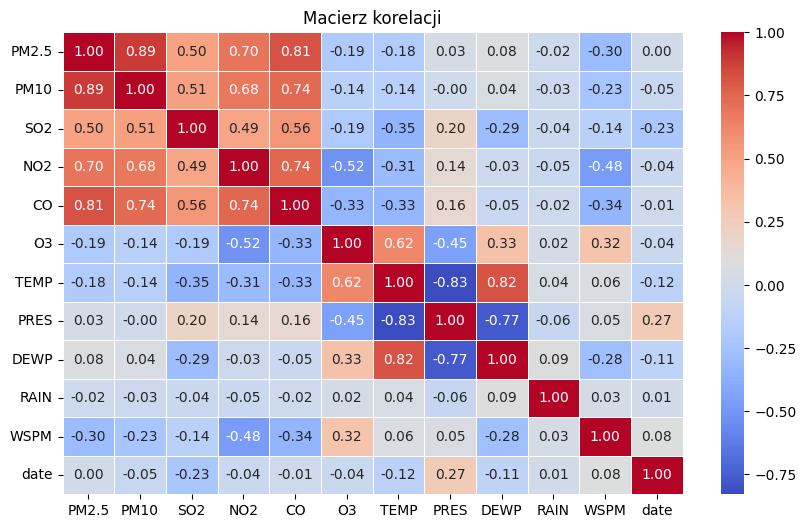

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

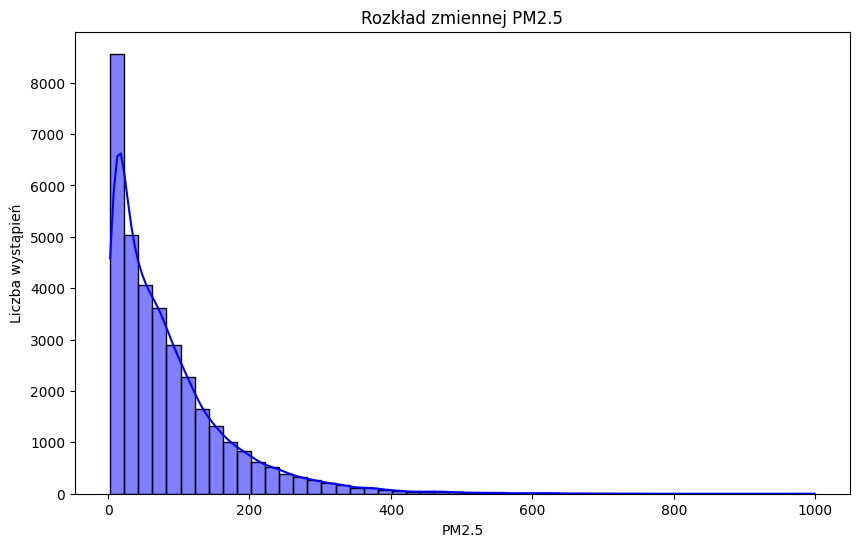

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PM2.5'].dropna(), kde=True, bins=50, color='blue')
plt.title('Rozkład zmiennej PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Liczba wystąpień')
plt.show()

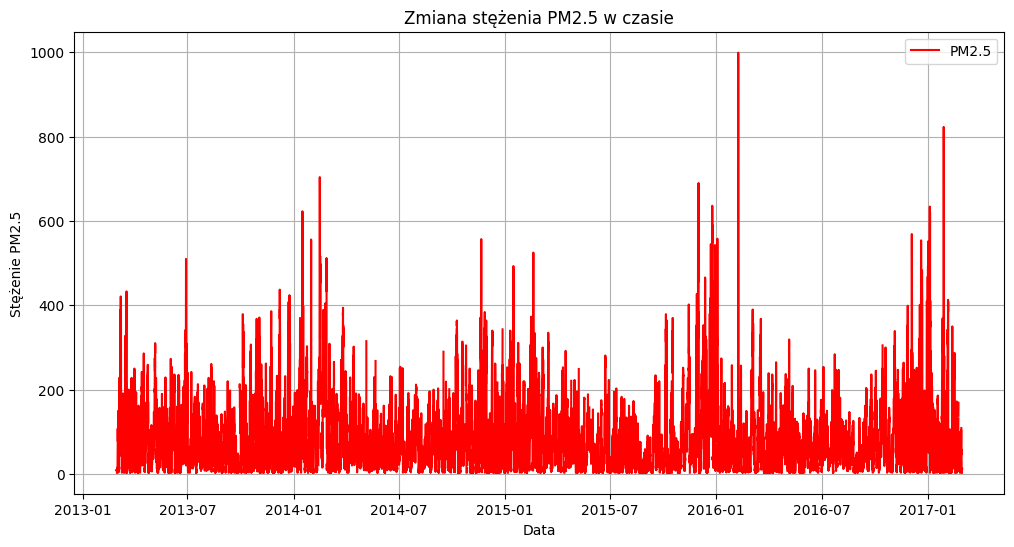

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['PM2.5'], label='PM2.5', color='red')
plt.xlabel('Data')
plt.ylabel('Stężenie PM2.5')
plt.title('Zmiana stężenia PM2.5 w czasie')
plt.legend()
plt.grid()
plt.show()

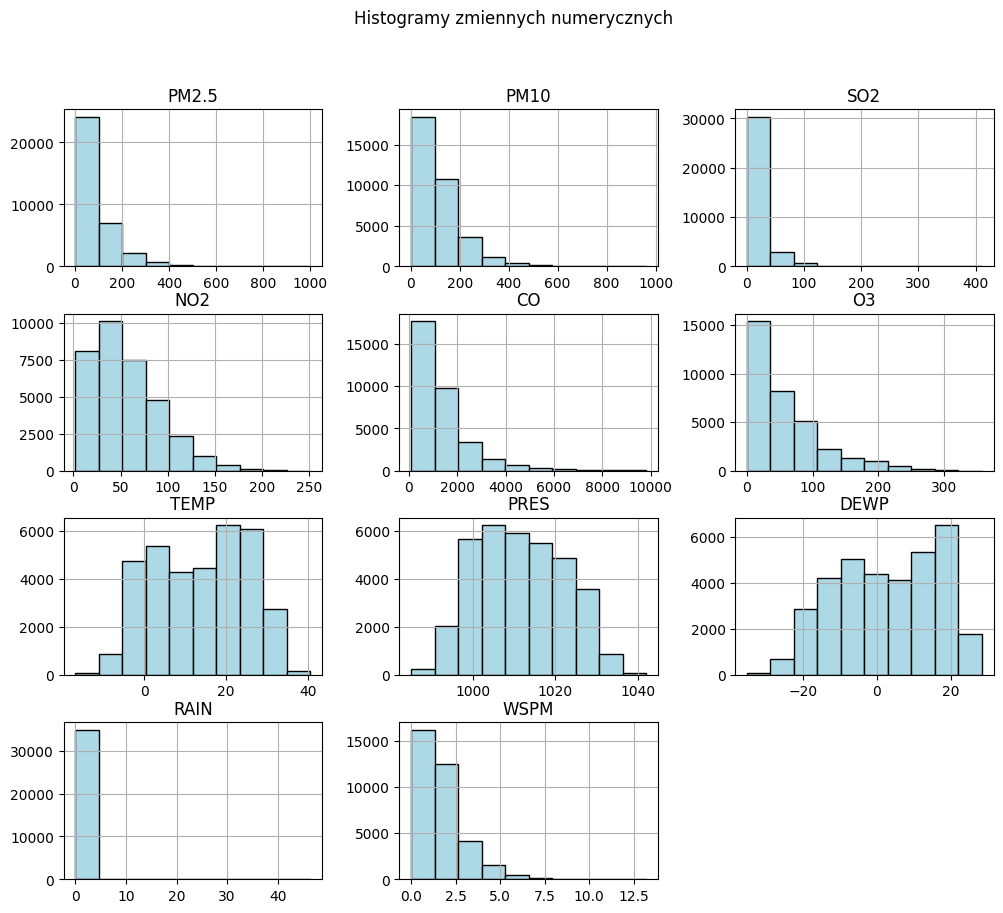

In [ ]:
numeric_columns = df.select_dtypes(include=['float64']).columns
df[numeric_columns].hist(figsize=(12, 10), layout=(4, 3), color='lightblue', edgecolor='black')
plt.suptitle('Histogramy zmiennych numerycznych')
plt.show()

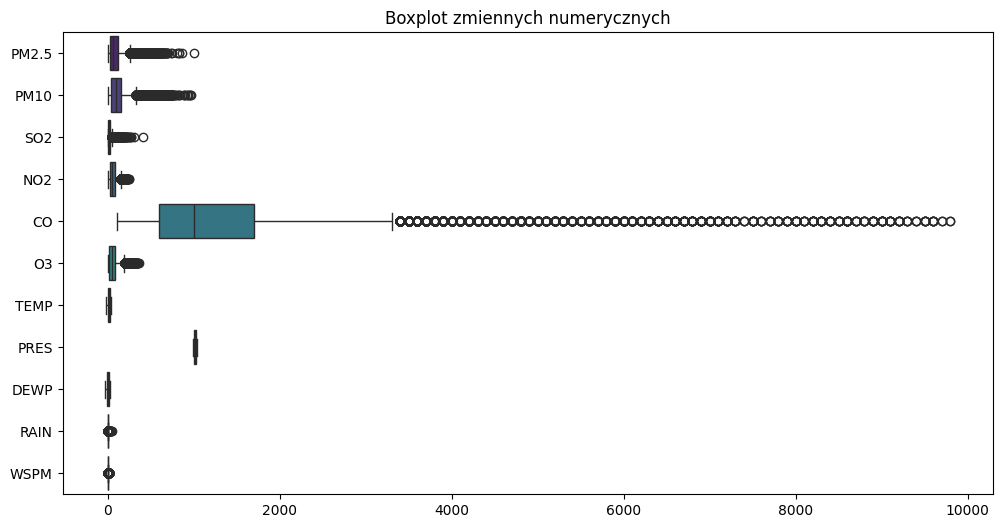

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns], orient='h', palette='viridis')
plt.title('Boxplot zmiennych numerycznych')
plt.show()

In [ ]:
df_cleaned = df.dropna(subset=["PM2.5"])

In [ ]:
print(f"Rozmiar danych przed usunięciem braków w PM2.5: {df.shape}")
print(f"Rozmiar danych po usunięciu braków w PM2.5: {df_cleaned.shape}")

Rozmiar danych przed usunięciem braków w PM2.5: (35064, 12)
Rozmiar danych po usunięciu braków w PM2.5: (34368, 12)


In [ ]:
df_cleaned_without_rain = df_cleaned.drop(columns=['RAIN'])
df_interpolated = df_cleaned_without_rain.interpolate(method='linear', limit_direction='both')

df_interpolated['RAIN'] = df_cleaned['RAIN']


In [ ]:
df_interpolated.isnull().sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEWP,0
WSPM,0


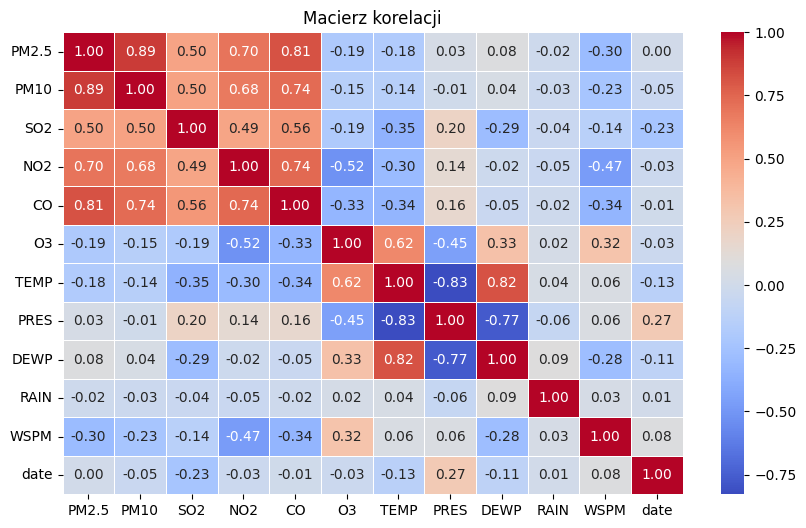

In [ ]:
correlation_matrix_i = df_interpolated.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_i, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

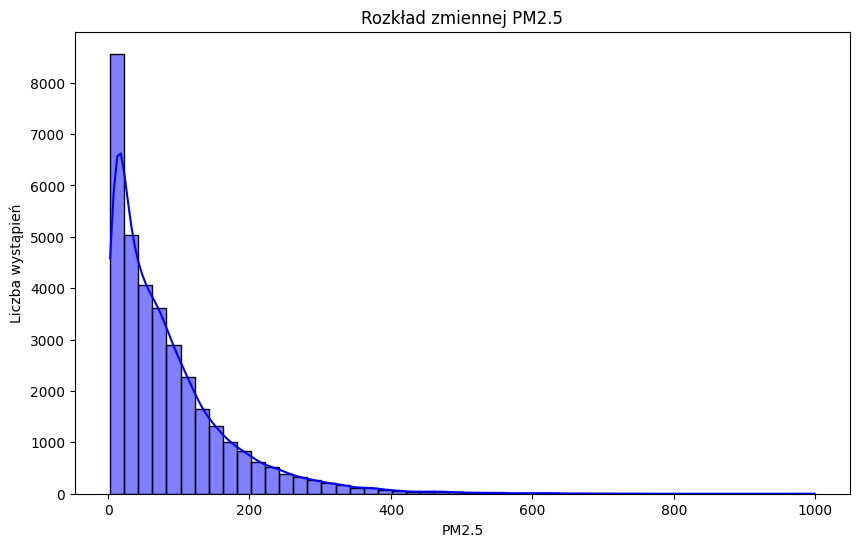

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_interpolated['PM2.5'].dropna(), kde=True, bins=50, color='blue')
plt.title('Rozkład zmiennej PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Liczba wystąpień')
plt.show()

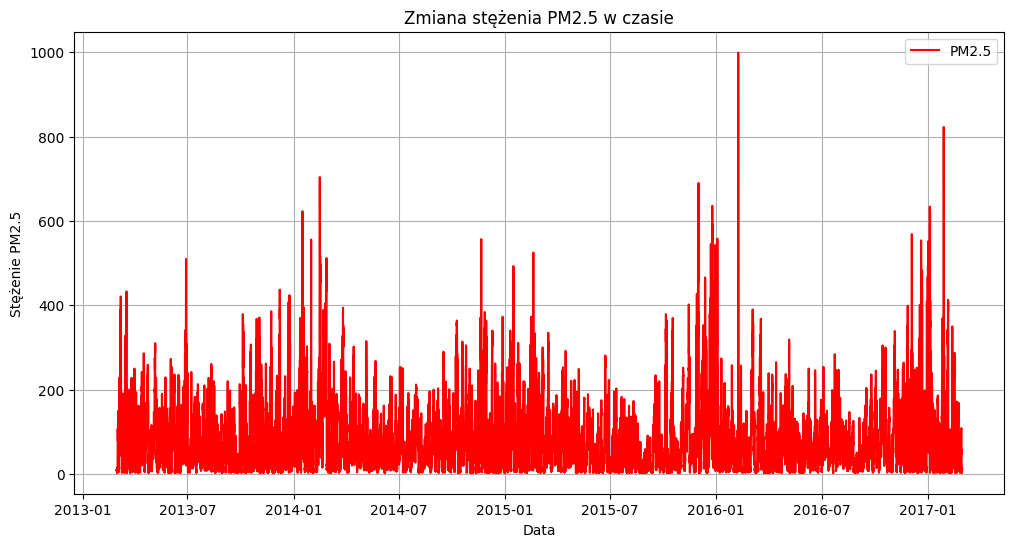

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_interpolated['date'], df_interpolated['PM2.5'], label='PM2.5', color='red')
plt.xlabel('Data')
plt.ylabel('Stężenie PM2.5')
plt.title('Zmiana stężenia PM2.5 w czasie')
plt.legend()
plt.grid()
plt.show()

In [ ]:
df_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34368 entries, 0 to 35063
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PM2.5   34368 non-null  float64       
 1   PM10    34368 non-null  float64       
 2   SO2     34368 non-null  float64       
 3   NO2     34368 non-null  float64       
 4   CO      34368 non-null  float64       
 5   O3      34368 non-null  float64       
 6   TEMP    34368 non-null  float64       
 7   PRES    34368 non-null  float64       
 8   DEWP    34368 non-null  float64       
 9   WSPM    34368 non-null  float64       
 10  date    34368 non-null  datetime64[ns]
 11  RAIN    34349 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 3.4 MB


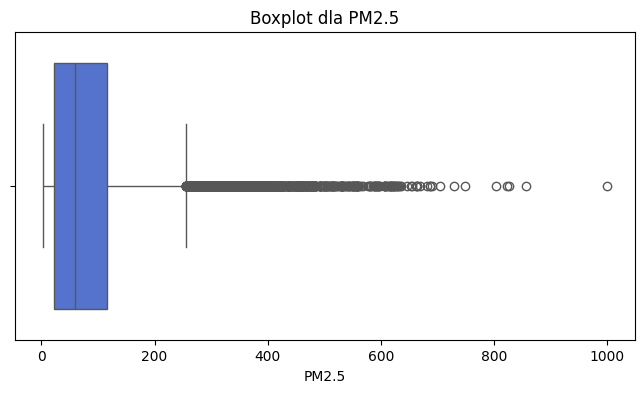

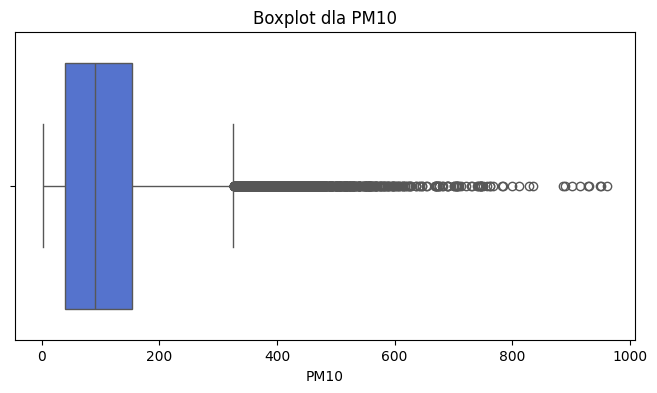

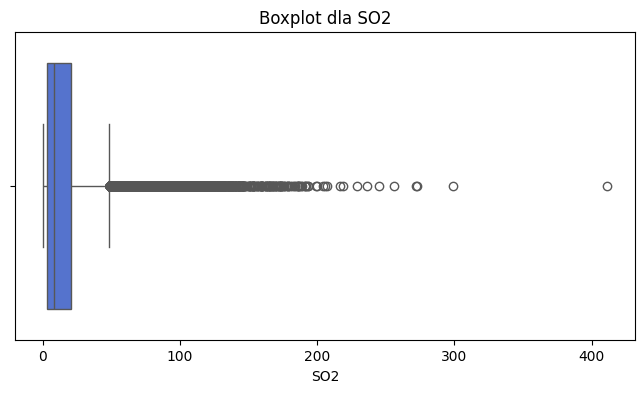

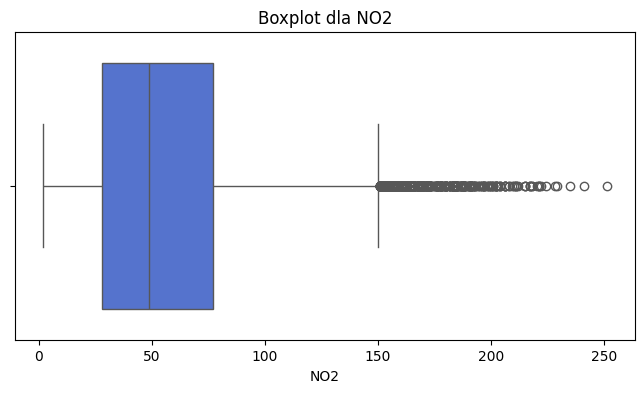

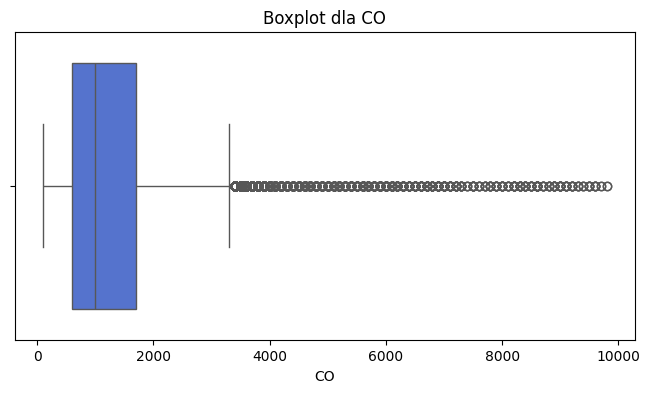

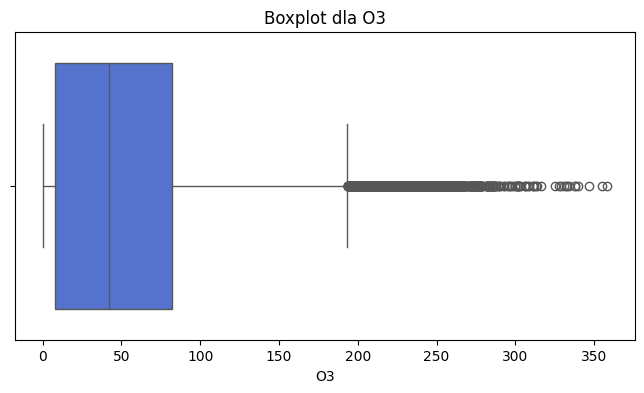

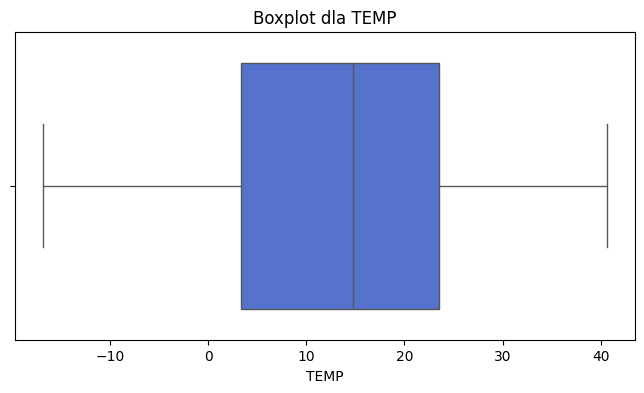

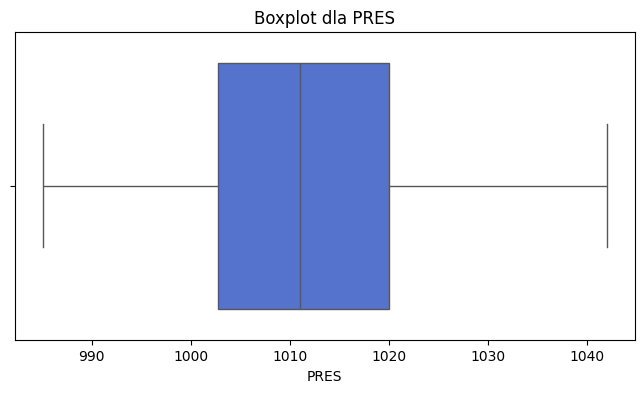

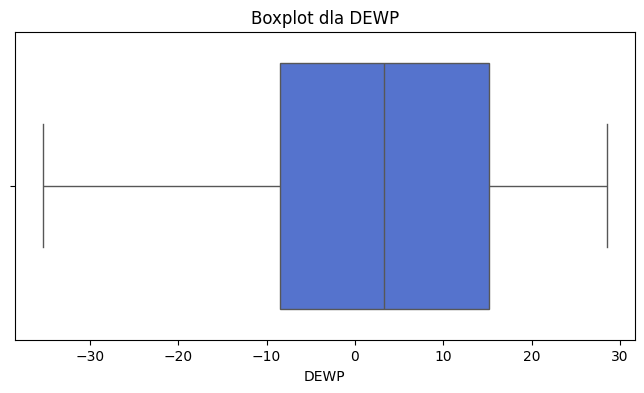

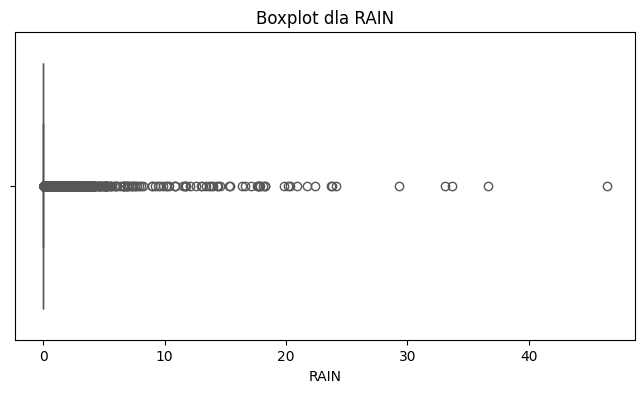

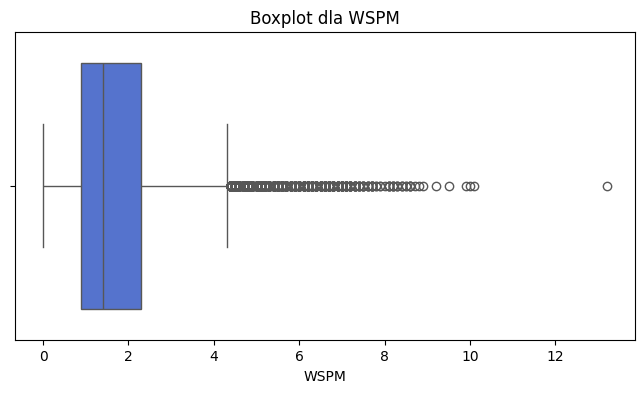

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='royalblue')
    plt.title(f'Boxplot dla {col}')
    plt.show()

In [ ]:
df_interpolated['RAIN'].unique()

array([0, 1])

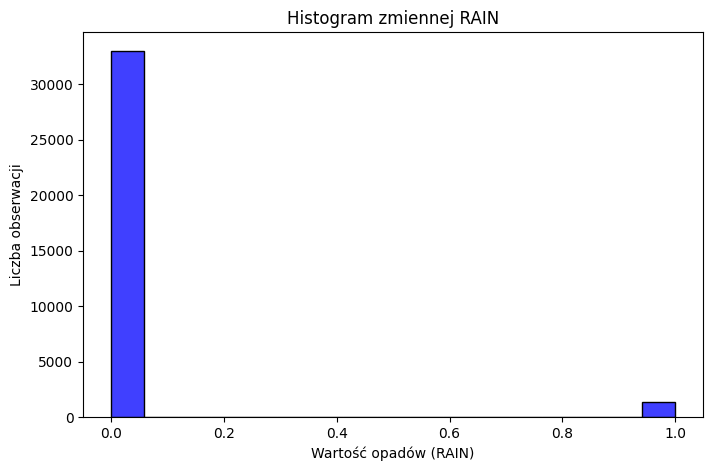

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_interpolated["RAIN"], color='blue')

plt.xlabel("Wartość opadów (RAIN)")
plt.ylabel("Liczba obserwacji")
plt.title("Histogram zmiennej RAIN")

plt.show()

In [ ]:
print("Liczba zerowych wartości RAIN:", (df_interpolated["RAIN"] == 0).sum())
print("Liczba niezerowych wartości RAIN:", (df_interpolated["RAIN"] > 0).sum())

Liczba zerowych wartości RAIN: 33004
Liczba niezerowych wartości RAIN: 1345


Ze względu na niską korelacje pomiędzy danymi o deszczu oraz naszą zmienną celu oraz praktycznie nieistniejące zróżnicowanie jej wartości, zdecydowałem się na próbe wykorzystania tej danej tylko jako informacje czy opady zaszły czy nie. Może to będzie lepiej reprezentować wpływ deszczu.

In [ ]:
df_interpolated['RAIN'] = df_interpolated['RAIN'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df_interpolated['RAIN'] = df_interpolated['RAIN'].astype(float)

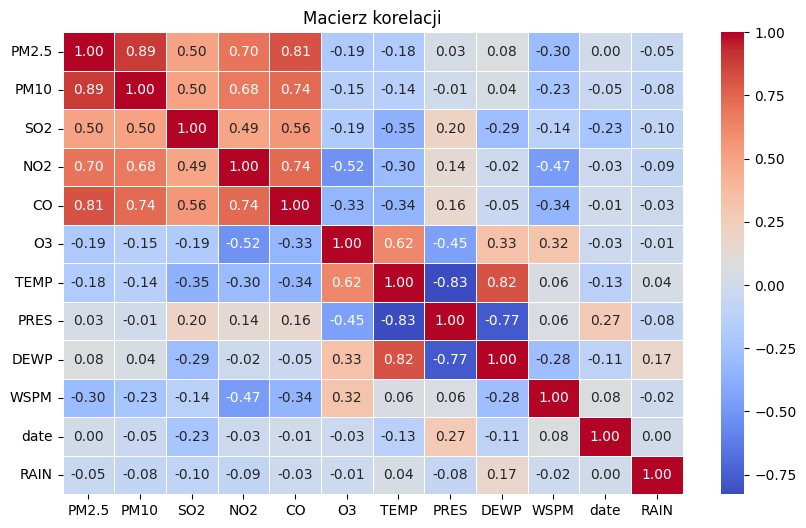

In [ ]:
correlation_matrix_i = df_interpolated.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_i, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

In [ ]:
df_interpolated.describe().T

,count,mean,min,25%,50%,75%,max,std
PM2.5,34368.0,85.024136,3.0,23.0,60.0,116.0,999.0,85.975981
PM10,34368.0,112.439121,2.0,39.0,91.0,154.0,961.0,98.050989
SO2,34368.0,17.333003,0.2856,3.0,8.0,21.0,411.0,24.133211
NO2,34368.0,55.565462,2.0,28.0,49.0,77.0,251.0,35.771892
CO,34368.0,1375.00515,100.0,600.0,1000.0,1700.0,9800.0,1228.552034
O3,34368.0,55.447471,0.2142,8.0,41.0,81.0,358.0,56.857033
TEMP,34368.0,13.730478,-16.8,3.4,14.7,23.4,40.6,11.376962
PRES,34368.0,1011.53813,985.1,1002.9,1011.0,1020.0,1042.0,10.569808
DEWP,34368.0,2.677686,-35.3,-8.5,3.3,15.3,28.5,13.729979
WSPM,34368.0,1.74369,0.0,0.9,1.4,2.3,13.2,1.205465


In [ ]:
df1 = df_interpolated

In [ ]:
df1.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'WSPM', 'date', 'RAIN'],
      dtype='object')

In [ ]:
df1 = df1[df1['RAIN'].notna()]

y = df1['PM2.5'].values
X = df1.drop(columns=['PM2.5', 'date', 'RAIN']).values

rain_column = df1['RAIN']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM'])



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, shuffle=False)

X_train = pd.DataFrame(X_train, columns=['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM'])
X_test = pd.DataFrame(X_test, columns=['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM'])


X_train['RAIN'] = rain_column.iloc[X_train.index].values
X_test['RAIN'] = rain_column.iloc[X_test.index].values

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

print(X_train['RAIN'].isna().sum())
print(X_test['RAIN'].isna().sum())


0
0


In [ ]:
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of x_test: {X_test.shape}")

Shape of y_train: (30931, 1)
Shape of y_test: (3437, 1)
Shape of x_train: (30931, 10)
Shape of x_test: (3437, 10)


In [ ]:
print(X_train)

           PM10       SO2       NO2        CO        O3      TEMP      PRES  \
0     -1.054968 -0.469609 -1.078110 -0.956429  0.115247 -1.180515  0.980341   
1     -1.034570 -0.428171 -1.161976 -0.956429  0.185600 -1.215674  1.027647   
2     -1.065167 -0.511046 -1.106065 -0.956429  0.062483 -1.259623  1.046569   
3     -1.065167 -0.593921 -1.106065 -0.915730 -0.139782 -1.268413  1.131718   
4     -1.065167 -0.593921 -1.217886 -0.875031 -0.342047 -1.285993  1.188484   
...         ...       ...       ...       ...       ...       ...       ...   
30926 -0.708204 -0.635358 -0.574914 -0.386644 -0.500341  0.050060  0.857348   
30927 -0.799995 -0.635358 -0.798557 -0.468042 -0.377223  0.014901  0.781659   
30928 -0.749000 -0.635358 -0.714691 -0.386644 -0.517929 -0.029048  0.762737   
30929 -0.749000 -0.635358 -0.602869 -0.305246 -0.658635 -0.046628  0.715432   
30930 -0.728602 -0.635358 -0.435137 -0.142450 -0.799341 -0.072998  0.630283   

           DEWP      WSPM  RAIN  
0     -1.578881  

In [ ]:
window_size = 24
batch_size = 64

train_generator = TimeseriesGenerator(
    X_train, y_train, length=window_size, batch_size=batch_size
)
test_generator = TimeseriesGenerator(
    X_test, y_test, length=window_size, batch_size=batch_size
)


In [ ]:
model = Sequential()

model.add(LSTM(128, activation='relu', input_shape=(window_size, 10), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(8, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
batch = next(iter(train_generator))
x_batch, y_batch = batch
print(x_batch.dtype)
print(y_batch.dtype)

float64
float64


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


483/483 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.6997 - mae: 0.5712 - val_loss: 1.5533 - val_mae: 0.7514
Epoch 2/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.4537 - mae: 0.4400 - val_loss: 0.4383 - val_mae: 0.4088
Epoch 3/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.3095 - mae: 0.3863 - val_loss: 0.4565 - val_mae: 0.3970
Epoch 4/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3460 - mae: 0.3732 - val_loss: 0.4092 - val_mae: 0.3937
Epoch 5/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.3005 - mae: 0.3672 - val_loss: 0.2778 - val_mae: 0.3158
Epoch 6/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3294 - mae: 0.3734 - val_loss: 0.4139 - val_mae: 0.3989
Epoch 7/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2234 - mae: 0.3266 - val_loss: 0.2869 - val_mae: 0.3160
Epoch 8/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2347 - mae: 0.3335 - val_loss: 0.3445 - val_mae: 0.3557
Epoch 9/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/s

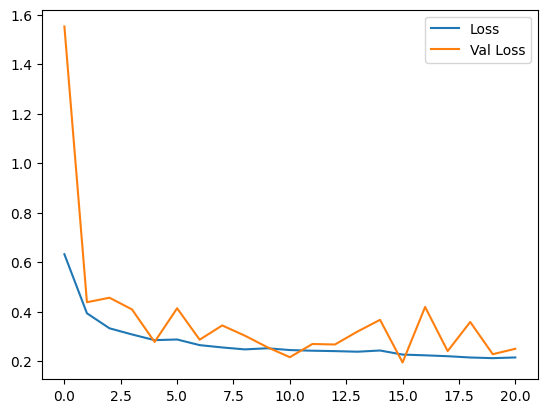

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

483/483 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
🔹 MSE (Trening): 677.2901, R² (Trening): 0.8969
🔹 MSE (Test): 1279.4195, R² (Test): 0.9083


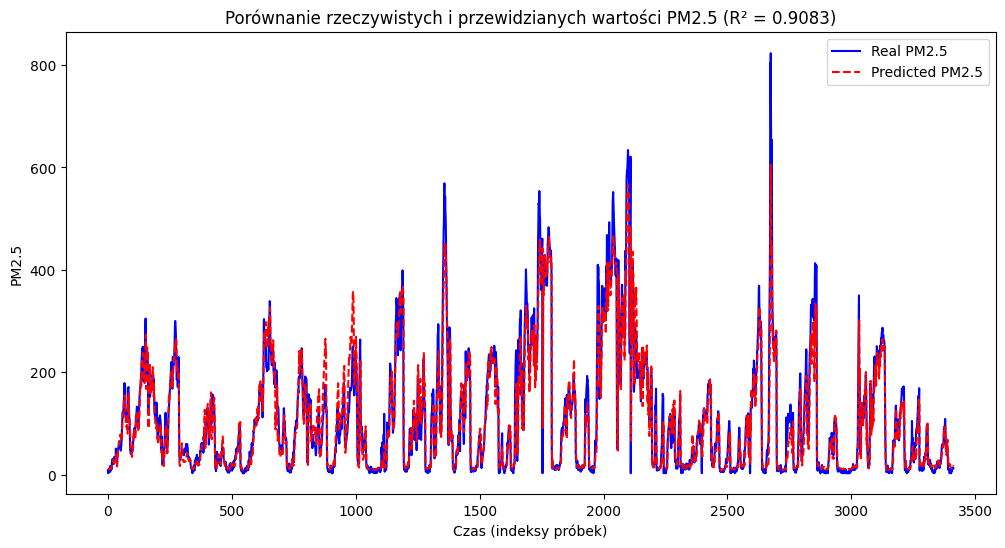

In [ ]:
y_pred_train = model.predict(train_generator)
y_pred_test = model.predict(test_generator)

y_train_inv = scaler_y.inverse_transform(y_train[window_size:])
y_test_inv = scaler_y.inverse_transform(y_test[window_size:])

y_pred_train_inv = scaler_y.inverse_transform(y_pred_train)
y_pred_test_inv = scaler_y.inverse_transform(y_pred_test)

mse_train = mean_squared_error(y_train_inv, y_pred_train_inv)
r2_train = r2_score(y_train_inv, y_pred_train_inv)

mse_test = mean_squared_error(y_test_inv, y_pred_test_inv)
r2_test = r2_score(y_test_inv, y_pred_test_inv)

print(f"🔹 MSE (Trening): {mse_train:.4f}, R² (Trening): {r2_train:.4f}")
print(f"🔹 MSE (Test): {mse_test:.4f}, R² (Test): {r2_test:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Real PM2.5", color='blue')
plt.plot(y_pred_test_inv, label="Predicted PM2.5", color='red', linestyle="dashed")
plt.xlabel("Czas (indeksy próbek)")
plt.ylabel("PM2.5")
plt.title(f"Porównanie rzeczywistych i przewidzianych wartości PM2.5 (R² = {r2_test:.4f})")
plt.legend()
plt.show()


In [ ]:
model_2 = Sequential()

model_2.add(LSTM(128, activation='relu', input_shape=(window_size, 10), return_sequences=True))
model_2.add(Dropout(0.3))

model_2.add(LSTM(64, activation='relu', return_sequences=True))
model_2.add(Dropout(0.3))

model_2.add(LSTM(32, activation='relu', return_sequences=True))
model_2.add(Dropout(0.3))

model_2.add(LSTM(8, activation='relu'))
model_2.add(Dropout(0.3))

model_2.add(Dense(1))

model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 1.3502 - mae: 0.6153 - val_loss: 1.0175 - val_mae: 0.6372
Epoch 2/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.5445 - mae: 0.5054 - val_loss: 0.7993 - val_mae: 0.5553
Epoch 3/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.4793 - mae: 0.4666 - val_loss: 0.5087 - val_mae: 0.4539
Epoch 4/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.4319 - mae: 0.4350 - val_loss: 0.5134 - val_mae: 0.4351
Epoch 5/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.3233 - mae: 0.3869 - val_loss: 0.6280 - val_mae: 0.5085
Epoch 6/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.4497 - mae: 0.4362 - val_loss: 0.3583 - val_mae: 0.3753
Epoch 7/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3016 - mae: 0.3768 - val_loss: 0.3227 - val_mae: 0.3271
Epoch 8/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3258 - mae: 0.3806 - val_loss: 0.3161 - val_mae: 0.3328
Epoch 9/100
483/483 ━━━━━━━━━━━━━━━━━━━

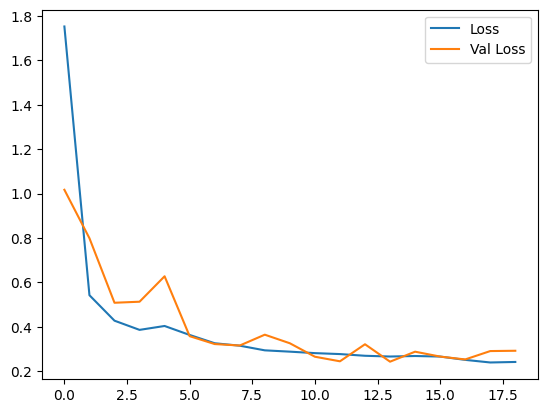

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_2.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

483/483 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
🔹 MSE (Trening): 935.5575, R² (Trening): 0.8576
🔹 MSE (Test): 1599.0488, R² (Test): 0.8854


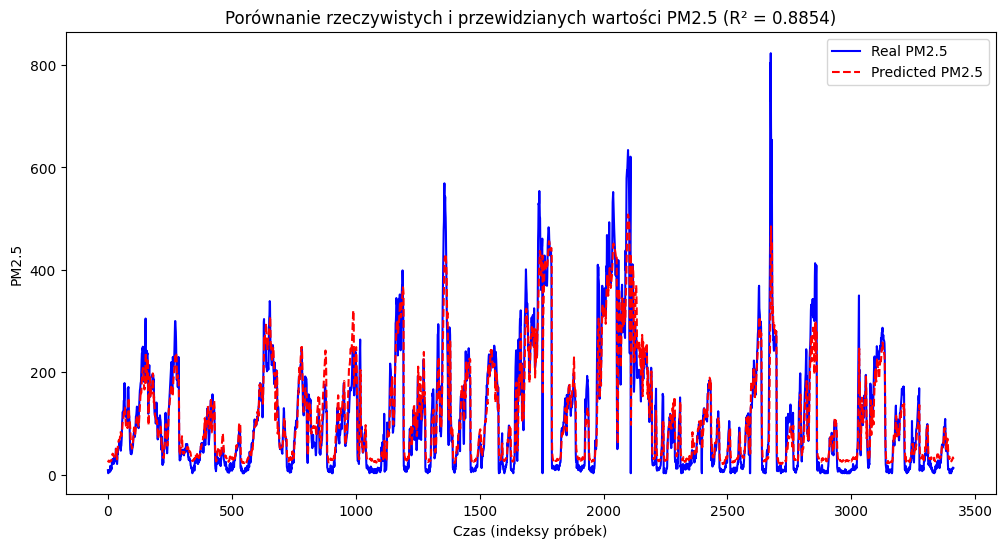

In [ ]:
y_pred_train_2 = model_2.predict(train_generator)
y_pred_test_2 = model_2.predict(test_generator)

y_train_inv_2 = scaler_y.inverse_transform(y_train[window_size:])
y_test_inv_2 = scaler_y.inverse_transform(y_test[window_size:])

y_pred_train_inv_2 = scaler_y.inverse_transform(y_pred_train_2)
y_pred_test_inv_2 = scaler_y.inverse_transform(y_pred_test_2)

mse_train_2 = mean_squared_error(y_train_inv, y_pred_train_inv_2)
r2_train_2 = r2_score(y_train_inv, y_pred_train_inv_2)

mse_test_2 = mean_squared_error(y_test_inv_2, y_pred_test_inv_2)
r2_test_2 = r2_score(y_test_inv_2, y_pred_test_inv_2)

print(f"🔹 MSE (Trening): {mse_train_2:.4f}, R² (Trening): {r2_train_2:.4f}")
print(f"🔹 MSE (Test): {mse_test_2:.4f}, R² (Test): {r2_test_2:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv_2, label="Real PM2.5", color='blue')
plt.plot(y_pred_test_inv_2, label="Predicted PM2.5", color='red', linestyle="dashed")
plt.xlabel("Czas (indeksy próbek)")
plt.ylabel("PM2.5")
plt.title(f"Porównanie rzeczywistych i przewidzianych wartości PM2.5 (R² = {r2_test_2:.4f})")
plt.legend()
plt.show()


In [ ]:
model_3 = Sequential()

model_3.add(LSTM(128, activation='relu', input_shape=(window_size, 10), return_sequences=True))
model_3.add(Dropout(0.3))

model_3.add(LSTM(32, activation='relu', return_sequences=True))
model_3.add(Dropout(0.3))

model_3.add(LSTM(8, activation='relu'))
model_3.add(Dropout(0.3))

model_3.add(Dense(1))

model_3.compile(optimizer=RMSprop(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - loss: 0.6164 - mae: 0.5489 - val_loss: 0.6513 - val_mae: 0.4998
Epoch 2/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.6292 - mae: 0.4689 - val_loss: 0.5424 - val_mae: 0.4546
Epoch 3/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3988 - mae: 0.4186 - val_loss: 0.6452 - val_mae: 0.4218
Epoch 4/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.3661 - mae: 0.4088 - val_loss: 0.3959 - val_mae: 0.3785
Epoch 5/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.3868 - mae: 0.4025 - val_loss: 0.4603 - val_mae: 0.4052
Epoch 6/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.3476 - mae: 0.3752 - val_loss: 0.4475 - val_mae: 0.3891
Epoch 7/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3004 - mae: 0.3703 - val_loss: 0.2831 - val_mae: 0.3160
Epoch 8/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2801 - mae: 0.3571 - val_loss: 0.3182 - val_mae: 0.3247
Epoch 9/100
483/483 ━━━━━━━━━━━━━━━━━

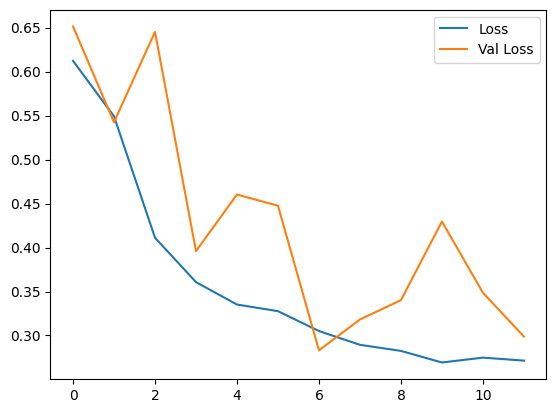

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_3.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
🔹 MSE (Trening): 990.0950, R² (Trening): 0.8493
🔹 MSE (Test): 1860.2642, R² (Test): 0.8667


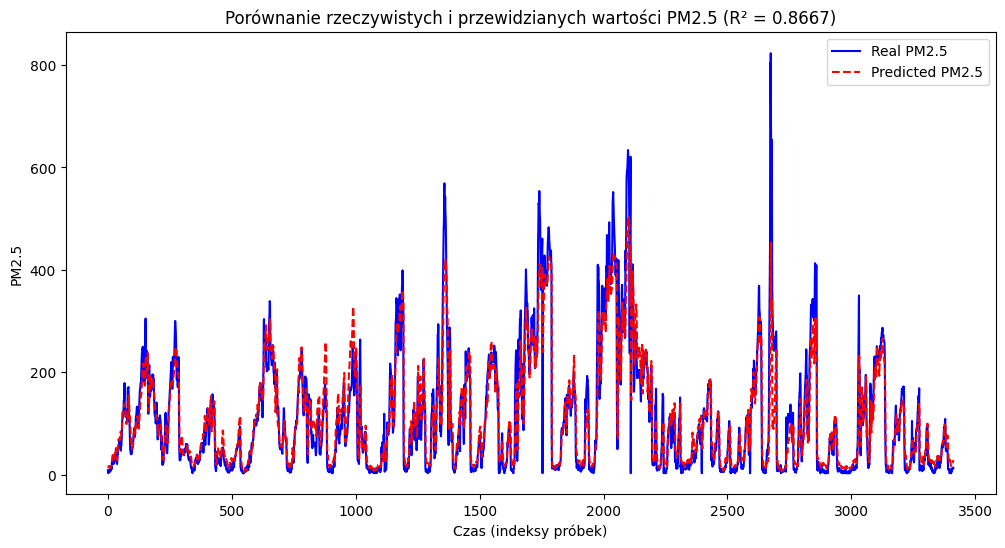

In [ ]:
y_pred_train_3 = model_3.predict(train_generator)
y_pred_test_3 = model_3.predict(test_generator)


y_train_inv_3 = scaler_y.inverse_transform(y_train[window_size:])
y_test_inv_3 = scaler_y.inverse_transform(y_test[window_size:])

y_pred_train_inv_3 = scaler_y.inverse_transform(y_pred_train_3)
y_pred_test_inv_3 = scaler_y.inverse_transform(y_pred_test_3)

mse_train_3 = mean_squared_error(y_train_inv_3, y_pred_train_inv_3)
r2_train_3 = r2_score(y_train_inv_3, y_pred_train_inv_3)

mse_test_3 = mean_squared_error(y_test_inv_3, y_pred_test_inv_3)
r2_test_3 = r2_score(y_test_inv_3, y_pred_test_inv_3)

print(f"🔹 MSE (Trening): {mse_train_3:.4f}, R² (Trening): {r2_train_3:.4f}")
print(f"🔹 MSE (Test): {mse_test_3:.4f}, R² (Test): {r2_test_3:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv_3, label="Real PM2.5", color='blue')
plt.plot(y_pred_test_inv_3, label="Predicted PM2.5", color='red', linestyle="dashed")
plt.xlabel("Czas (indeksy próbek)")
plt.ylabel("PM2.5")
plt.title(f"Porównanie rzeczywistych i przewidzianych wartości PM2.5 (R² = {r2_test_3:.4f})")
plt.legend()
plt.show()


Pierwszy model był najlepszy. Dodanie warstwy z 64 komórkami nie poprawiło wyników, tak samo jak zmiana optymalizatora na RMSprop. Spróbuje usunąć z df dane o niskiej korelacji ze zmienną celu.

In [ ]:
df_2 = df1.drop(columns=['PM2.5', 'date', 'PRES', 'DEWP', 'RAIN'])

y = df1['PM2.5'].values

scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(df_2)
X_scaled_2 = pd.DataFrame(X_scaled_2, columns=df_2.columns)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, y, test_size=0.1, shuffle=False)

X_train_2 = pd.DataFrame(X_train_2, columns=df_2.columns)
X_test_2 = pd.DataFrame(X_test_2, columns=df_2.columns)

scaler_y = StandardScaler()
y_train_2 = scaler_y.fit_transform(y_train_2.reshape(-1, 1))
y_test_2 = scaler_y.transform(y_test_2.reshape(-1, 1))

print(f"Kolumny w X_train_2: {X_train_2.columns.tolist()}")
print(f"Kolumny w X_test_2: {X_test_2.columns.tolist()}")


Kolumny w X_train_2: ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'WSPM']
Kolumny w X_test_2: ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'WSPM']


In [ ]:
window_size = 24
batch_size = 64

train_generator_2 = TimeseriesGenerator(
    X_train_2, y_train_2, length=window_size, batch_size=batch_size
)
test_generator_2 = TimeseriesGenerator(
    X_test_2, y_test_2, length=window_size, batch_size=batch_size
)


In [ ]:
model_4 = Sequential()

model_4.add(LSTM(128, activation='relu', input_shape=(window_size, 7), return_sequences=True))
model_4.add(Dropout(0.3))
model_4.add(BatchNormalization())

model_4.add(LSTM(32, activation='relu', return_sequences=True))
model_4.add(Dropout(0.3))
model_4.add(BatchNormalization())

model_4.add(LSTM(8, activation='relu'))
model_4.add(Dropout(0.3))
model_4.add(BatchNormalization())

model_4.add(Dense(1))

model_4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


Epoch 1/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 1.5207 - mae: 0.8851 - val_loss: 2.4012 - val_mae: 1.0002
Epoch 2/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.9252 - mae: 0.6868 - val_loss: 1.2140 - val_mae: 0.7379
Epoch 3/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.7344 - mae: 0.6325 - val_loss: 1.1668 - val_mae: 0.6920
Epoch 4/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.7081 - mae: 0.6063 - val_loss: 0.6006 - val_mae: 0.5074
Epoch 5/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.6520 - mae: 0.5901 - val_loss: 1.1165 - val_mae: 0.6933
Epoch 6/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.8119 - mae: 0.6331 - val_loss: 0.9105 - val_mae: 0.6037
Epoch 7/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.8086 - mae: 0.6055 - val_loss: 1.0371 - val_mae: 0.6572
Epoch 8/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.6896 - mae: 0.5900 - val_loss: 0.6439 - val_mae: 0.4904
Epoch 9/100
483/483 ━━━━━━━━━━━━━━━━━━━━ 4s

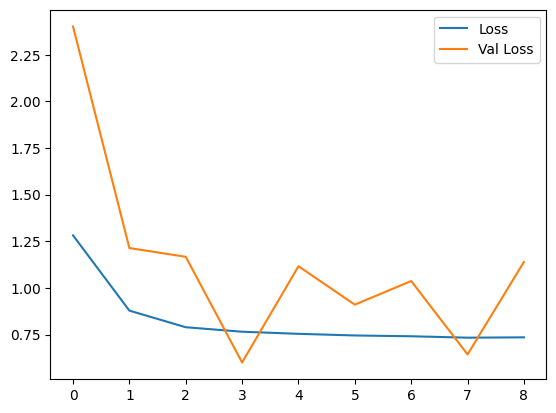

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_4.fit(train_generator_2, epochs=100, validation_data=test_generator_2, callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
🔹 MSE (Trening): 1968.7500, R² (Trening): 0.7004
🔹 MSE (Test): 3946.2246, R² (Test): 0.7173


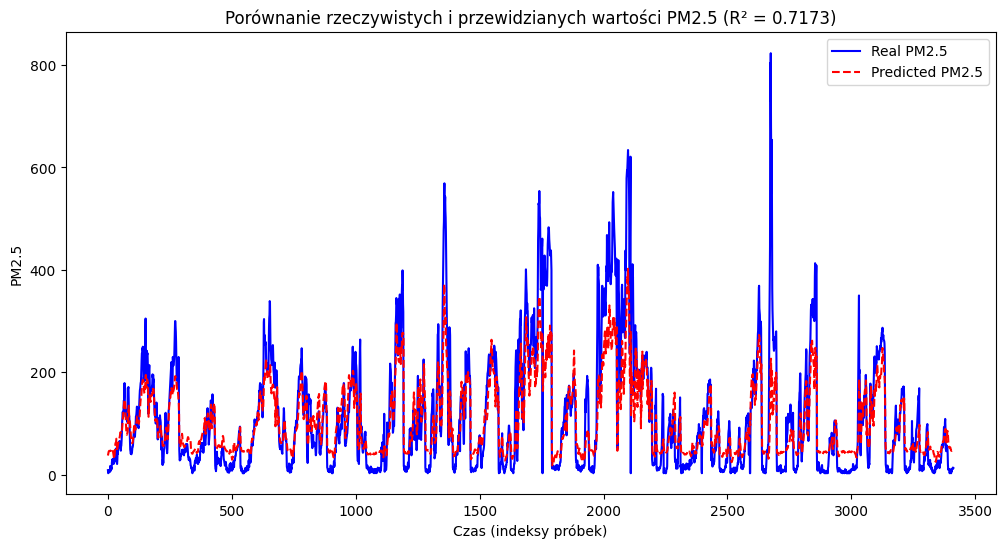

In [ ]:
y_pred_train_4 = model_4.predict(train_generator_2)
y_pred_test_4 = model_4.predict(test_generator_2)

y_train_inv_4 = scaler_y.inverse_transform(y_train_2[window_size:])
y_test_inv_4 = scaler_y.inverse_transform(y_test_2[window_size:])

y_pred_train_inv_4 = scaler_y.inverse_transform(y_pred_train_4)
y_pred_test_inv_4 = scaler_y.inverse_transform(y_pred_test_4)

mse_train_4 = mean_squared_error(y_train_inv_4, y_pred_train_inv_4)
r2_train_4 = r2_score(y_train_inv_4, y_pred_train_inv_4)

mse_test_4 = mean_squared_error(y_test_inv_4, y_pred_test_inv_4)
r2_test_4 = r2_score(y_test_inv_4, y_pred_test_inv_4)

print(f"🔹 MSE (Trening): {mse_train_4:.4f}, R² (Trening): {r2_train_4:.4f}")
print(f"🔹 MSE (Test): {mse_test_4:.4f}, R² (Test): {r2_test_4:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv_4, label="Real PM2.5", color='blue')
plt.plot(y_pred_test_inv_4, label="Predicted PM2.5", color='red', linestyle="dashed")
plt.xlabel("Czas (indeksy próbek)")
plt.ylabel("PM2.5")
plt.title(f"Porównanie rzeczywistych i przewidzianych wartości PM2.5 (R² = {r2_test_4:.4f})")
plt.legend()
plt.show()


Wyniki tego projektu mogą zaskakiwać ponieważ kolejne próby zmiany parametrów, dodawanie kolejnych warstw i "komplikowanie" modelu przynosiły zawsze gorsze wyniki niż "pierwszy model". Zauważyłem, że zamiana danych z wartości nominalnych na typ bool, który określa czy deszcz tylko zaszedł lub nie oraz usunięcie rekordów z pustymi wartościami w tej kolumnie poprawia wyniki.(pierwotny "pierwszy model" nie miał w sobie tej zmiany). Próby usunięcia innych kolumn z niską korelacją z zmienną celu, również przynosiły gorsze efekty. Możliwe, że zastosowanie metod feature engineering poprawiłoby wyniki.(Poniżej kod z tabelą wyników kolejnych prób tworzenia modelu)

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "MSE (Trening)", "R² (Trening)", "MSE (Test)", "R² (Test)"]

rows = [
    ["Model 1 (Adam, pełny zestaw cech)", 677.29, 0.8969, 1279.42, 0.9083],
    ["Model 2 (Adam, dodatkowa warstwa 64)", 935.56, 0.8576, 1599.05, 0.8854],
    ["Model 3 (RMSprop, warstwa 64)", 824.00, 0.8746, 1527.12, 0.8906],
    ["Model 3 (RMSprop, bez warstwy 64)", 877.27, 0.8665, 1577.93, 0.8870],
    ["Model 3 (RMSprop, lr = 0.0005)", 990.10, 0.8493, 1860.26, 0.8667],
    ["Model 4 (Adam, 7 cech zamiast 10)", 888.66, 0.8648, 1349.87, 0.9033],
    ["Model 4 (Batch Normalization, 7 cech)", 1968.75, 0.7004, 3946.22, 0.7173],
]

for row in rows:
    table.add_row(row)

print(table)


+---------------------------------------+---------------+--------------+------------+-----------+
|                 Model                 | MSE (Trening) | R² (Trening) | MSE (Test) | R² (Test) |
+---------------------------------------+---------------+--------------+------------+-----------+
|   Model 1 (Adam, pełny zestaw cech)   |     677.29    |    0.8969    |  1279.42   |   0.9083  |
|  Model 2 (Adam, dodatkowa warstwa 64) |     935.56    |    0.8576    |  1599.05   |   0.8854  |
|     Model 3 (RMSprop, warstwa 64)     |     824.0     |    0.8746    |  1527.12   |   0.8906  |
|   Model 3 (RMSprop, bez warstwy 64)   |     877.27    |    0.8665    |  1577.93   |   0.887   |
|     Model 3 (RMSprop, lr = 0.0005)    |     990.1     |    0.8493    |  1860.26   |   0.8667  |
|   Model 4 (Adam, 7 cech zamiast 10)   |     888.66    |    0.8648    |  1349.87   |   0.9033  |
| Model 4 (Batch Normalization, 7 cech) |    1968.75    |    0.7004    |  3946.22   |   0.7173  |
+-------------------

<!--
| Model | MSE (Trening) | R² (Trening) | MSE (Test) | R² (Test) |
|---|---|---|---|---|
| Model 1 (Adam, pełny zestaw cech) | 677.29 | 0.8969 | 1279.42 | 0.9083 |
| Model 2 (Adam, dodatkowa warstwa 64) | 935.56 | 0.8576 | 1599.05 | 0.8854 |
| Model 3 (RMSprop, warstwa 64) | 824.00 | 0.8746 | 1527.12 | 0.8906 |
| Model 3 (RMSprop, bez warstwy 64) | 877.27 | 0.8665 | 1577.93 | 0.8870 |
| Model 3 (RMSprop, lr = 0.0005) | 990.10 | 0.8493 | 1860.26 | 0.8667 |
| Model 4 (Adam, 7 cech zamiast 10) | 888.66 | 0.8648 | 1349.87 | 0.9033 |
| Model 4 (Batch Normalization, 7 cech) | 1968.75 | 0.7004 | 3946.22 | 0.7173 |
-->